## Lista 5
## Maciej Karczewski

### Zad 1
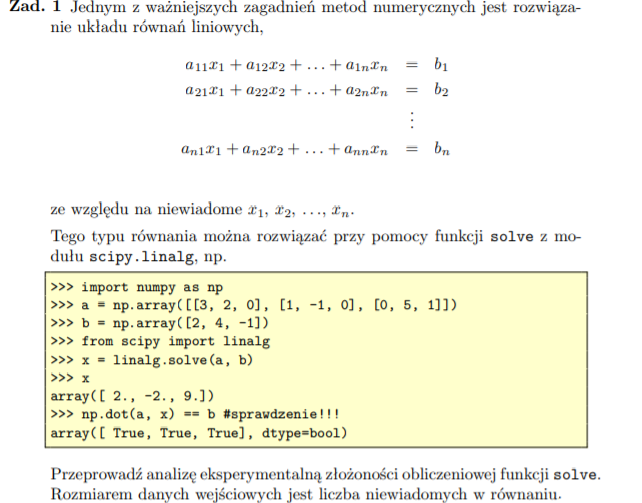


In [ ]:
import numpy as np
from scipy import linalg 
import time
import matplotlib.pyplot as plt
import pandas as pd

def time_solve_lineq(n):
    
    times = []
    for _ in range(100):
        a = np.random.randint(1, 9000, size=(n, n))
        b = np.random.randint(1,9999, size =n)
        try:
            start = time.time()
            linalg.solve(a,b)
            end = time.time()
            times.append(end-start)
            
        except np.linalg.LinAlgError:
            return time_solve_lineq(n)
    return np.mean(times)


count_of_variables = np.logspace(3,11,9,base=2,dtype=np.int32)
times_of_solves = np.array([time_solve_lineq(x) for x in count_of_variables ])

ratios = np.array([None]*len(times_of_solves))
for i in range(len(times_of_solves) -1):
    ratios[i + 1] = times_of_solves[i+1]/times_of_solves[i]

logs = np.array([None]*len(times_of_solves))
for i in range(1, len(times_of_solves)):
    logs[i] = np.log2(ratios[i])

df = pd.DataFrame()
df['count_of_variables'] = count_of_variables.tolist()
df["times_of_solves"] = times_of_solves.tolist()
df['ratios'] = ratios.tolist()
df['logs'] = logs.tolist()
print(df)
df.to_csv('wyniki_czasu5.csv')


Dla arguentów mniejszych równych 2048 złożoność możemy oszacować jako $$ O(n^{1.95}) $$

   Unnamed: 0  count_of_variables  times_of_solves    ratios      logs
0           0                   8         0.000193       NaN       NaN
1           1                  16         0.000403  2.084063  1.059399
2           2                  32         0.000929  2.305260  1.204930
3           3                  64         0.002348  2.526628  1.337213
4           4                 128         0.005284  2.250051  1.169958
5           5                 256         0.010737  2.031951  1.022866
6           6                 512         0.018808  1.751799  0.808837
7           7                1024         0.045603  2.424634  1.277767
8           8                2048         0.196866  4.316947  2.110011


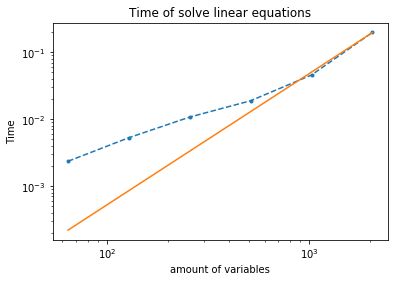

1.9598528906072592


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
df = pd.read_csv("wyniki_czasu5.csv")
print(df)
def function(x,a,b):
    return a*x**b
popt, _ =curve_fit(function,df['count_of_variables'][3:], df['times_of_solves'][3:])
plt.plot(df['count_of_variables'][3:], df['times_of_solves'][3:], marker= '.', linestyle='--' )
plt.plot(df['count_of_variables'][3:], popt[0]*np.power(df['count_of_variables'][3:], popt[1]))
plt.ylabel('Time')
plt.title('Time of solve linear equations')
plt.xlabel('amount of variables')
plt.xscale('log')
plt.yscale('log')
plt.show()
print(popt[1])

Natopiast dla większy n cięko stwierdzić złożoność

    Unnamed: 0  count_of_variables  times_of_solves     ratios      logs
0            0                   2         0.003010        NaN       NaN
1            1                   4         0.000000   0.000000      -inf
2            2                   8         0.002986        inf       inf
3            3                  16         0.000937   0.313957 -1.671360
4            4                  32         0.000997   1.063327  0.088585
5            5                  64         0.001993   1.999522  0.999655
6            6                 128         0.003986   2.000000  1.000000
7            7                 256         0.007967   1.998684  0.999051
8            8                 512         0.022918   2.876414  1.524271
9            9                1024         0.057811   2.522533  1.334873
10          10                2048         0.218271   3.775603  1.916707
11          11                4096         1.452381   6.654042  2.734231
12          12                8192         7.144153

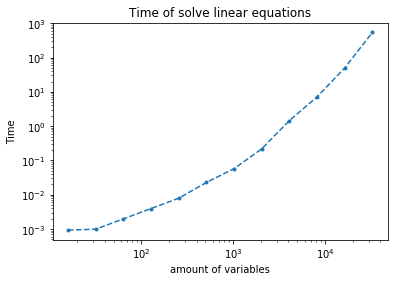

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
df = pd.read_csv("wyniki_czasu2.csv")
print(df)

plt.plot(df['count_of_variables'][3:], df['times_of_solves'][3:], marker= '.', linestyle='--' )
plt.ylabel('Time')
plt.title('Time of solve linear equations')
plt.xlabel('amount of variables')
plt.xscale('log')
plt.yscale('log')
plt.show()


### Zad 2

Napisz program rozwiązujący zagadnienie wieży z Hanoi. Użyj trzech
stosów do przechowywania krążków

Problem polega na przeniesieniu krążków z pierwszego palika na drugi korzystając z trzeciego z następującumi zasadami:
- można przenosić tylko jeden krązek na raz
- krążek większy nie może być na mniejszym

Problem można rozwiązać w sposób rekurencyjny:
1. przenieś n - 1 krążków ze słupka A na słupek B przy pomocy C
2. przenieś krążek z A na C
3. przenieś n - 1 krążków z B na C przy pomocy A

In [8]:
class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

    def __str__(self):
        return str(self.items)


def hanoi_problem(n=4):
    """Fuction solve hanoi problem with using stack and print each steps by printing each stacks
    @pam n:(Int) number of pucks"""
    pole_a = Stack()
    for i in range(n, 0, -1):
        pole_a.push(i)
    pole_b = Stack()
    pole_c = Stack()

    print(str(pole_a) + " " + str(pole_b) + " " + str(pole_c))

    def move_tower(n, start_pole, end_pole, buff_pole):
        if n == 0:
            print(str(pole_a) + " " + str(pole_b) + " " + str(pole_c))
        elif n == 1:
            end_pole.push(start_pole.pop())
            print(str(pole_a) + " " + str(pole_b) + " " + str(pole_c))
        elif n > 1:
            move_tower(n - 1, start_pole, buff_pole, end_pole)
            end_pole.push(start_pole.pop())
            print(str(pole_a) + " " + str(pole_b) + " " + str(pole_c))
            move_tower(n-1, buff_pole, end_pole, start_pole)

    move_tower(n, pole_a, pole_b, pole_c)
    
hanoi_problem(5)

[5, 4, 3, 2, 1] [] []
[5, 4, 3, 2] [1] []
[5, 4, 3] [1] [2]
[5, 4, 3] [] [2, 1]
[5, 4] [3] [2, 1]
[5, 4, 1] [3] [2]
[5, 4, 1] [3, 2] []
[5, 4] [3, 2, 1] []
[5] [3, 2, 1] [4]
[5] [3, 2] [4, 1]
[5, 2] [3] [4, 1]
[5, 2, 1] [3] [4]
[5, 2, 1] [] [4, 3]
[5, 2] [1] [4, 3]
[5] [1] [4, 3, 2]
[5] [] [4, 3, 2, 1]
[] [5] [4, 3, 2, 1]
[1] [5] [4, 3, 2]
[1] [5, 2] [4, 3]
[] [5, 2, 1] [4, 3]
[3] [5, 2, 1] [4]
[3] [5, 2] [4, 1]
[3, 2] [5] [4, 1]
[3, 2, 1] [5] [4]
[3, 2, 1] [5, 4] []
[3, 2] [5, 4, 1] []
[3] [5, 4, 1] [2]
[3] [5, 4] [2, 1]
[] [5, 4, 3] [2, 1]
[1] [5, 4, 3] [2]
[1] [5, 4, 3, 2] []
[] [5, 4, 3, 2, 1] []


### Zad 3
Korzystając z modułu turtle, napisz program, który narysuje krzywą Hilberta

Krzywa Hilberta to krzywa która dąży do całkowitego zapepełninia kwadratu a powstaje ona poprzez algorytm rekurencyjny:
1. narysuj krzywą Hilberta stopnia n - 1
2. następnie narysuj  krzywą Hilberta stopnia n - 1 obróconą o kąt prosty w lewo
3. następnie narysuj  krzywą Hilberta stopnia n - 1 obróconą o kąt prosty w lewo

gdzie krzywa Hilberta stopnia 0 to odcinek 

In [7]:
import  turtle
def hilbert_line(level = 4,angle =90, size =300 , speed = 5):


    def draw_hilbert_line(level, angle, step):
        if level == 0:
            return
        turtle.right(angle)
        draw_hilbert_line(level - 1, -angle, step)

        turtle.forward(step)
        turtle.left(angle)
        draw_hilbert_line(level - 1, angle, step)

        turtle.forward(step)
        draw_hilbert_line(level - 1, angle, step)

        turtle.left(angle)
        turtle.forward(step)
        draw_hilbert_line(level - 1, -angle, step)
        turtle.right(angle)
        
    turtle.penup()
    turtle.speed(speed)
    turtle.goto(-size/2, size/2)
    turtle.pendown()
    draw_hilbert_line(level , angle, size/(2**level -1))
    turtle.done()
    


hilbert_line(level= 5, speed=5000)


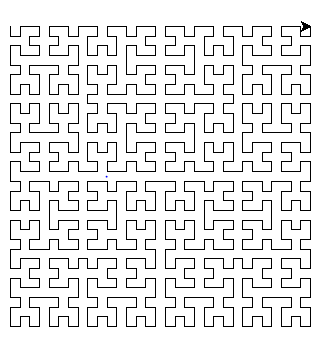

### Zad 4
Napisz program, który narysuje krzywą Kocha

Algorytm krzywej Kocha polega na dzieleiu odcinku na trzy części i zastąpi środkowej części ramionami trójkąta równobocznego o długości 1/3 odcinka . Gdy połączymy trzy takie krzywe wyjdzie nam tak zwany płatek Kocha

In [ ]:
import turtle

def snowflake(length = 300 , level = 3, speed=5):
    def draw_koch_line(length,level):
        if level == 0:
            turtle.forward(length)
            return
        length /= 3
        draw_koch_line(length, level -1)
        turtle.left(60)
        draw_koch_line(length, level -1)
        turtle.right(120)
        draw_koch_line(length, level -1)
        turtle.left(60)
        draw_koch_line(length, level -1)

    turtle.penup()
    turtle.speed(speed)
    turtle.goto(-length/2,length/2)
    turtle.pendown()
    for _ in range(3):
        draw_koch_line(length,level)
        turtle.right(120)
    turtle.done()

snowflake(speed=1000, level= 4)


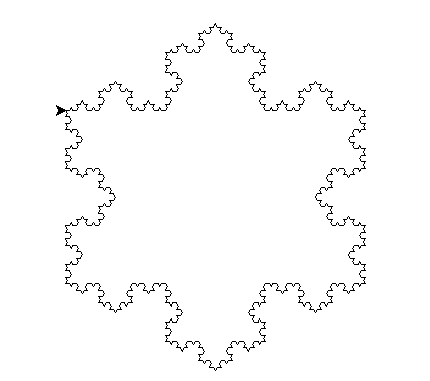

### Kod 
https://github.com/maciejkar/lista5